In [49]:
from dotenv import load_dotenv
import warnings

warnings.filterwarnings("ignore")
load_dotenv('../.env')

True

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
pd.set_option('display.max_columns', None)

In [52]:
data = pd.read_csv('../data/trainingSet.csv')
display(data.shape)
data.head()

(311106, 40)

,index,eventType,period,periodTime,periodType,gameID,teamOfShooter,homeOrAway,xCoord,yCoord,shooter,goalie,shotType,emptyNet,strength,season,rinkSide,gameType,totalPlayTime,lastEventType,lastEventPeriod,lastEventPeriodTime,lastEventXCoord,lastEventYCoord,Goal,EmptyNet,distanceFromNet,angle,gameSeconds,lastEventGameSeconds,timeFromLastEvent,distanceFromLastEvent,rebound,lastEventAngle,changeInAngleShot,speed,timeSincePowerPlayStarted,numFriendlyNonGoalieSkaters,numOpposingNonGoalieSkaters,strength2
0,0,Shot,1,00:51,REGULAR,2015020001,Toronto Maple Leafs,home,-55.0,6.0,Brad Boyes,Carey Price,Wrist Shot,NaN,NaN,2015,right,R,01:00:00,Hit,1,00:40,94.0,-34.0,0.0,0.0,34.525353,79.992020,51.0,40.0,11.0,154.275727,0.0,NaN,NaN,14.025066,0.0,5.0,5.0,Even
1,1,Shot,1,01:05,REGULAR,2015020001,Toronto Maple Leafs,home,-79.0,0.0,Nazem Kadri,Carey Price,Snap Shot,NaN,NaN,2015,right,R,01:00:00,Giveaway,1,00:58,-37.0,-28.0,0.0,0.0,10.000000,90.000000,65.0,58.0,7.0,50.477718,0.0,NaN,NaN,7.211103,0.0,5.0,5.0,Even
2,2,Shot,1,01:06,REGULAR,2015020001,Toronto Maple Leafs,home,-75.0,-1.0,Nazem Kadri,Carey Price,Snap Shot,NaN,NaN,2015,right,R,01:00:00,Shot,1,01:05,-79.0,0.0,0.0,0.0,14.035669,94.085617,66.0,65.0,1.0,4.123106,1.0,NaN,NaN,4.123106,0.0,5.0,5.0,Even
3,3,Shot,1,01:53,REGULAR,2015020001,Toronto Maple Leafs,home,-55.0,-36.0,Daniel Winnik,Carey Price,Wrist Shot,NaN,NaN,2015,right,R,01:00:00,Hit,1,01:35,-91.0,35.0,0.0,0.0,49.517674,136.636577,113.0,95.0,18.0,79.605276,0.0,NaN,NaN,4.422515,0.0,5.0,5.0,Even
4,4,Shot,1,02:37,REGULAR,2015020001,Toronto Maple Leafs,home,-61.0,-1.0,Joffrey Lupul,Carey Price,Tip-In,NaN,NaN,2015,right,R,01:00:00,Faceoff,1,02:32,-69.0,-22.0,0.0,0.0,28.017851,92.045408,157.0,152.0,5.0,22.472205,0.0,NaN,NaN,4.494441,0.0,5.0,5.0,Even


In [53]:
# Read and preprocess data
df = data[['distanceFromNet', 'angle', 'EmptyNet', 'Goal']]
df = df.rename({'Goal': 'is_goal', 'distanceFromNet': 'distance'}, axis=1)
df = df.dropna().reset_index(drop=True)
df['is_goal'] = df['is_goal'].astype(np.int64)
display(df.shape)
df.head()

(311086, 4)

,distance,angle,EmptyNet,is_goal
0,34.525353,79.992020,0.0,0
1,10.000000,90.000000,0.0,0
2,14.035669,94.085617,0.0,0
3,49.517674,136.636577,0.0,0
4,28.017851,92.045408,0.0,0


### Question-1: plots

In [54]:
df_goals = df[df['is_goal']==1]
df_nongoals = df[df['is_goal']==0]

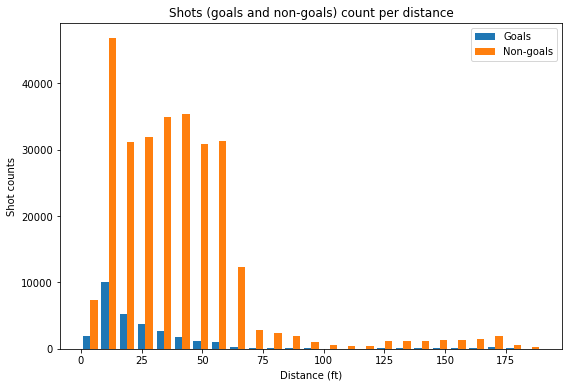

In [55]:
goals_distance = df_goals['distance'].to_numpy()
nongoals_distance = df_nongoals['distance'].to_numpy()

plt.figure(figsize=(9, 6))
plt.hist([goals_distance, nongoals_distance], bins=25, label=['Goals', 'Non-goals'])
plt.ylabel('Shot counts')
plt.xlabel('Distance (ft)')
plt.legend(loc='upper right')
plt.title('Shots (goals and non-goals) count per distance')
plt.show()

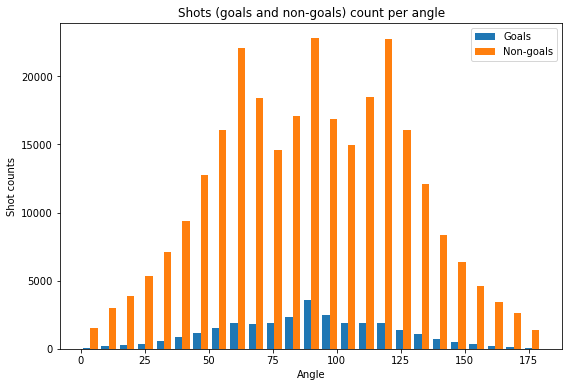

In [56]:
goals_angle = df_goals['angle'].to_numpy()
nongoals_angle = df_nongoals['angle'].to_numpy()

plt.figure(figsize=(9, 6))
plt.hist([goals_angle, nongoals_angle], bins=25, label=['Goals', 'Non-goals'])
plt.ylabel('Shot counts')
plt.xlabel('Angle')
plt.legend(loc='upper right')
plt.title('Shots (goals and non-goals) count per angle')
plt.show()

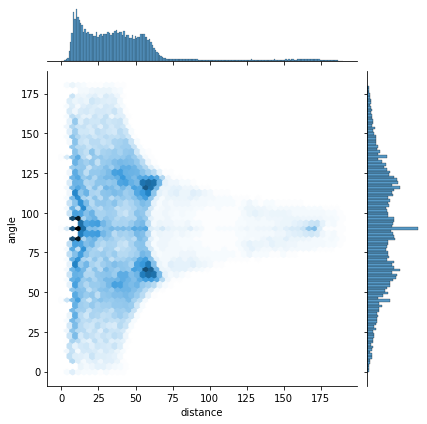

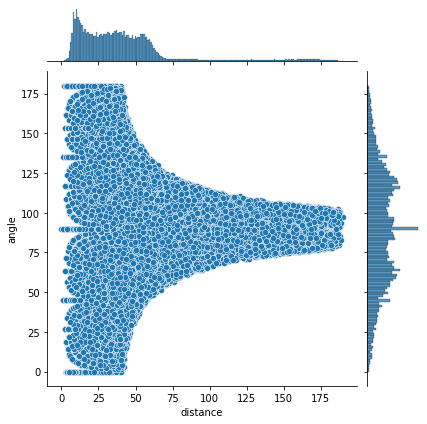

In [57]:
# option 1
sns.jointplot(data=df, x="distance", y="angle", bins=100, kind='hex')
plt.show()

# option 2
sns.jointplot(data=df, x="distance", y="angle")
plt.show()

### Question-2

In [58]:
df_goal_rate_per_distance = df.copy()
df_goal_rate_per_distance['distance1ft'] = df_goal_rate_per_distance['distance'].round() 
df_goal_rate_per_distance = df_goal_rate_per_distance.groupby('distance1ft')['is_goal'].mean().reset_index(name='goal_rate')
display(df_goal_rate_per_distance.head())

,distance1ft,goal_rate
0,0.0,1.000000
1,1.0,0.785714
2,2.0,0.523810
3,3.0,0.400000
4,4.0,0.315133


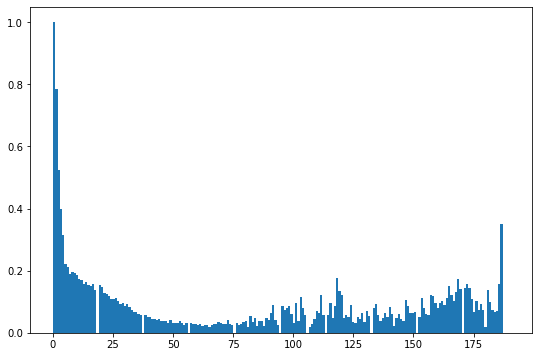

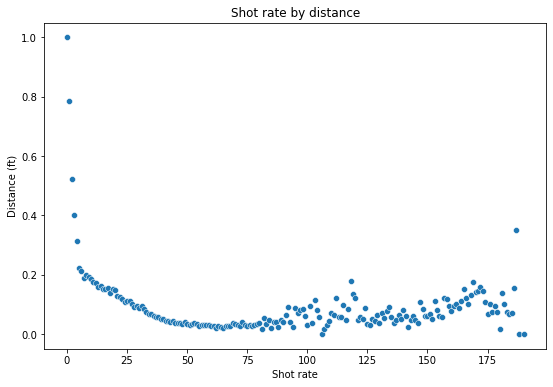

In [59]:
#option 1
plt.figure(figsize=(9, 6))
plt.hist(df_goal_rate_per_distance['distance1ft'], weights=df_goal_rate_per_distance['goal_rate'], bins=200)
plt.show()

# option 2
plt.figure(figsize=(9, 6))
sns.scatterplot(x="distance1ft", y="goal_rate", data=df_goal_rate_per_distance, palette="muted")
plt.title('Shot rate by distance')
plt.xlabel('Shot rate')
plt.ylabel('Distance (ft)')
plt.show()

In [60]:
df_goal_rate_per_distance = df.copy()
df_goal_rate_per_distance['angle1deg'] = df_goal_rate_per_distance['angle'].round() 
df_goal_rate_per_distance = df_goal_rate_per_distance.groupby('angle1deg')['is_goal'].mean().reset_index(name='goal_rate')
display(df_goal_rate_per_distance.head())

,angle1deg,goal_rate
0,0.0,0.077966
1,1.0,0.000000
2,2.0,0.024590
3,3.0,0.064103
4,4.0,0.063927


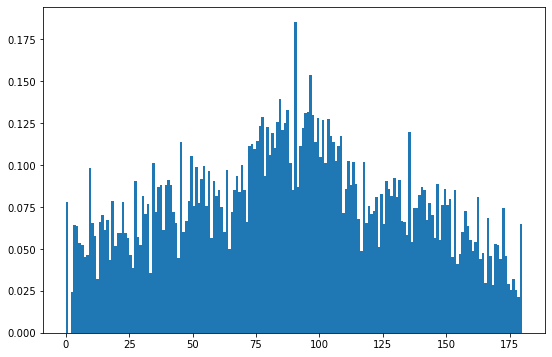

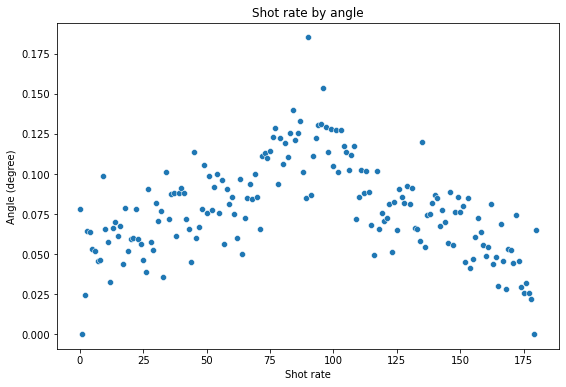

In [61]:
#option 1
plt.figure(figsize=(9, 6))
plt.hist(df_goal_rate_per_distance['angle1deg'], weights=df_goal_rate_per_distance['goal_rate'], bins=180)
plt.show()

# option 2
plt.figure(figsize=(9, 6))
sns.scatterplot(x="angle1deg", y="goal_rate", data=df_goal_rate_per_distance, palette="muted")
plt.title('Shot rate by angle')
plt.xlabel('Shot rate')
plt.ylabel('Angle (degree)')
plt.show()

### Question-3

In [62]:
df_dist_net_goals = df_goals[['distance', 'EmptyNet']]

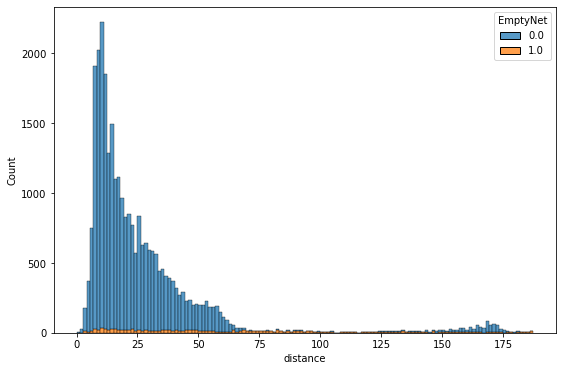

In [63]:
plt.figure(figsize=(9, 6))

sns.histplot(data=df_dist_net_goals, x="distance", hue="EmptyNet", multiple="stack")

plt.show()

#### Identify an event with incorrect features

**Idea:** A goal scored from a long distance (e.g., 180m) is possible if the net is empty but it is rare to have a goal from that distance while the net is not empty and in that case, it is high probable to be an anomaly (i.e., incorrect features).

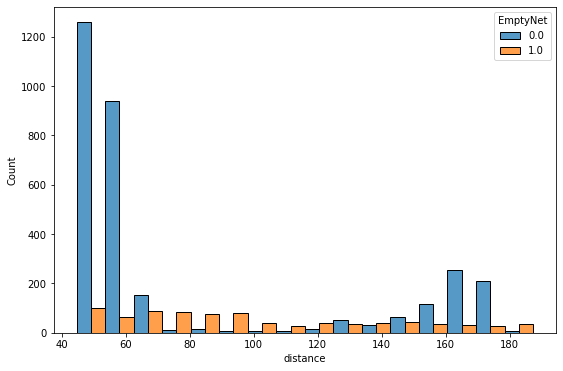

In [93]:
df_dist_net_goals2 = df_dist_net_goals.sort_values('distance', ascending=False)[:4000]

plt.figure(figsize=(9, 6))

sns.histplot(data=df_dist_net_goals2, x="distance", hue="EmptyNet", multiple="dodge")

plt.show()

In [94]:
df_suspecious = df_dist_net_goals2[df_dist_net_goals2['EmptyNet']==0]
df_suspecious.head()

,distance,EmptyNet
104733,187.181730,0.0
4192,186.131674,0.0
9678,183.847763,0.0
22721,182.101620,0.0
15507,181.276033,0.0


In [103]:
suspicious_event = df_suspecious.iloc[-1]
data[(data['distanceFromNet']==suspicious_event['distance']) & (data['eventType']=='Goal')]

,index,eventType,period,periodTime,periodType,gameID,teamOfShooter,homeOrAway,xCoord,yCoord,shooter,goalie,shotType,emptyNet,strength,season,rinkSide,gameType,totalPlayTime,lastEventType,lastEventPeriod,lastEventPeriodTime,lastEventXCoord,lastEventYCoord,Goal,EmptyNet,distanceFromNet,angle,gameSeconds,lastEventGameSeconds,timeFromLastEvent,distanceFromLastEvent,rebound,lastEventAngle,changeInAngleShot,speed,timeSincePowerPlayStarted,numFriendlyNonGoalieSkaters,numOpposingNonGoalieSkaters,strength2
1043,57,Goal,3,19:06,REGULAR,2015020018,Montréal Canadiens,away,-58.0,-32.0,Tomas Plekanec,Brendan Gallagher,Wrist Shot,True,Even,2015,right,R,01:00:00,Missed Shot,3,19:03,-14.0,37.0,1.0,1.0,44.553339,135.909380,3546.0,3543.0,3.0,81.835200,0.0,NaN,NaN,27.278400,0.0,5.0,5.0,Even
22848,27,Goal,2,02:22,REGULAR,2015020385,Boston Bruins,away,-58.0,32.0,Zdeno Chara,Karri Ramo,Wrist Shot,False,Even,2015,right,R,01:03:20,Missed Shot,2,02:20,-55.0,-6.0,1.0,0.0,44.553339,44.090620,1342.0,1340.0,2.0,38.118237,0.0,NaN,NaN,19.059119,0.0,5.0,5.0,Even
29904,27,Goal,2,08:22,REGULAR,2015020503,Nashville Predators,home,-57.0,31.0,Roman Josi,Dustin Tokarski,Slap Shot,False,Power Play,2015,right,R,01:00:00,Takeaway,2,07:56,-85.0,35.0,1.0,0.0,44.553339,45.909380,1702.0,1676.0,26.0,28.284271,0.0,NaN,NaN,1.087857,59.0,5.0,4.0,Power Play
30521,51,Goal,3,18:11,REGULAR,2015020514,Calgary Flames,home,-58.0,-32.0,Johnny Gaudreau,Mark Giordano,Wrist Shot,True,Even,2015,right,R,01:00:00,Blocked Shot,3,18:06,65.0,-18.0,1.0,1.0,44.553339,135.909380,3491.0,3486.0,5.0,123.794184,0.0,NaN,NaN,24.758837,0.0,5.0,5.0,Even
42391,47,Goal,3,06:00,REGULAR,2015020709,Vancouver Canucks,away,-45.0,7.0,Bo Horvat,Marc-Andre Fleury,Snap Shot,False,Even,2015,right,R,01:00:00,Shot,3,05:39,-64.0,14.0,1.0,0.0,44.553339,80.960517,2760.0,2739.0,21.0,20.248457,1.0,60.751174,20.209344,0.964212,0.0,5.0,5.0,Even
46054,27,Goal,2,09:57,REGULAR,2015020770,Anaheim Ducks,away,-45.0,-7.0,Hampus Lindholm,Jhonas Enroth,Slap Shot,False,Power Play,2015,right,R,01:00:00,Blocked Shot,2,09:44,-82.0,6.0,1.0,0.0,44.553339,99.039483,1797.0,1784.0,13.0,39.217343,0.0,NaN,NaN,3.016719,90.0,5.0,3.0,Power Play
49475,27,Goal,2,06:51,REGULAR,2015020824,Arizona Coyotes,home,-45.0,7.0,Oliver Ekman-Larsson,Jonas Hiller,Slap Shot,False,Power Play,2015,right,R,01:00:00,Faceoff,2,06:47,-69.0,22.0,1.0,0.0,44.553339,80.960517,1611.0,1607.0,4.0,28.301943,0.0,NaN,NaN,7.075486,84.0,4.0,3.0,Power Play
67231,18,Goal,1,16:55,REGULAR,2015021119,Toronto Maple Leafs,home,-57.0,31.0,Ben Smith,Tuukka Rask,Wrist Shot,False,Even,2015,right,R,01:00:00,Hit,1,16:52,-81.0,38.0,1.0,0.0,44.553339,45.909380,1015.0,1012.0,3.0,25.000000,0.0,NaN,NaN,8.333333,0.0,5.0,5.0,Even
96217,29,Goal,2,06:02,REGULAR,2016020369,Dallas Stars,away,-57.0,-31.0,Tyler Seguin,Semyon Varlamov,Slap Shot,False,Power Play,2016,right,R,01:00:00,Shot,2,05:57,-83.0,15.0,1.0,0.0,44.553339,134.090620,1562.0,1557.0,5.0,52.839379,1.0,21.801409,112.289210,10.567876,56.0,5.0,4.0,Power Play
113011,26,Goal,1,18:08,REGULAR,2016020646,New York Islanders,away,45.0,-7.0,Anders Lee,Cam Ward,Slap Shot,False,Even,2016,left,R,01:00:00,Blocked Shot,1,17:59,42.0,14.0,1.0,0.0,44.553339,80.960517,1088.0,1079.0,9.0,21.213203,0.0,NaN,NaN,2.357023,0.0,5.0,5.0,Even
